In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
housing = pd.read_csv("HousingFinal.csv")

In [5]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        545 non-null    int64  
 1   price             545 non-null    int64  
 2   area              545 non-null    int64  
 3   bedrooms          545 non-null    int64  
 4   bathrooms         545 non-null    int64  
 5   stories           545 non-null    int64  
 6   mainroad          545 non-null    object 
 7   guestroom         545 non-null    object 
 8   basement          545 non-null    object 
 9   hotwaterheating   545 non-null    object 
 10  airconditioning   545 non-null    object 
 11  parking           545 non-null    int64  
 12  prefarea          545 non-null    object 
 13  furnishingstatus  545 non-null    object 
 14  price_k           545 non-null    float64
 15  price_level       545 non-null    int64  
dtypes: float64(1), int64(8), object(7)
memory us

In [6]:
cat_feats = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [7]:
final_data = pd.get_dummies(housing, columns = cat_feats, drop_first=True)

In [8]:
final_data.head()

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,parking,price_k,price_level,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,13300000,7420,4,2,3,2,13300.0,4,True,False,False,False,True,True,False,False
1,2,12250000,8960,4,4,4,3,12250.0,4,True,False,False,False,True,False,False,False
2,3,12250000,9960,3,2,2,2,12250.0,4,True,False,True,False,False,True,True,False
3,4,12215000,7500,4,2,2,3,12215.0,4,True,False,True,False,True,True,False,False
4,5,11410000,7420,4,1,2,2,11410.0,4,True,True,True,False,True,False,False,False


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = final_data.drop('price_level',axis=1)
y = final_data['price_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=500)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       104
           2       0.96      1.00      0.98       109
           3       0.95      0.95      0.95       100
           4       1.00      0.95      0.97        96

    accuracy                           0.98       409
   macro avg       0.98      0.97      0.98       409
weighted avg       0.98      0.98      0.98       409



In [17]:
print(confusion_matrix(y_test,predictions))

[[104   0   0   0]
 [  0 109   0   0]
 [  0   5  95   0]
 [  0   0   5  91]]


[Text(0.6, 0.875, 'x[1] <= 5841500.0\ngini = 0.747\nsamples = 136\nvalue = [33, 29, 34, 40]'),
 Text(0.4, 0.625, 'x[0] <= 265.0\ngini = 0.665\nsamples = 96\nvalue = [33, 29, 34, 0]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34, 0]'),
 Text(0.6, 0.375, 'x[1] <= 3447500.0\ngini = 0.498\nsamples = 62\nvalue = [33, 29, 0, 0]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 0, 40]')]

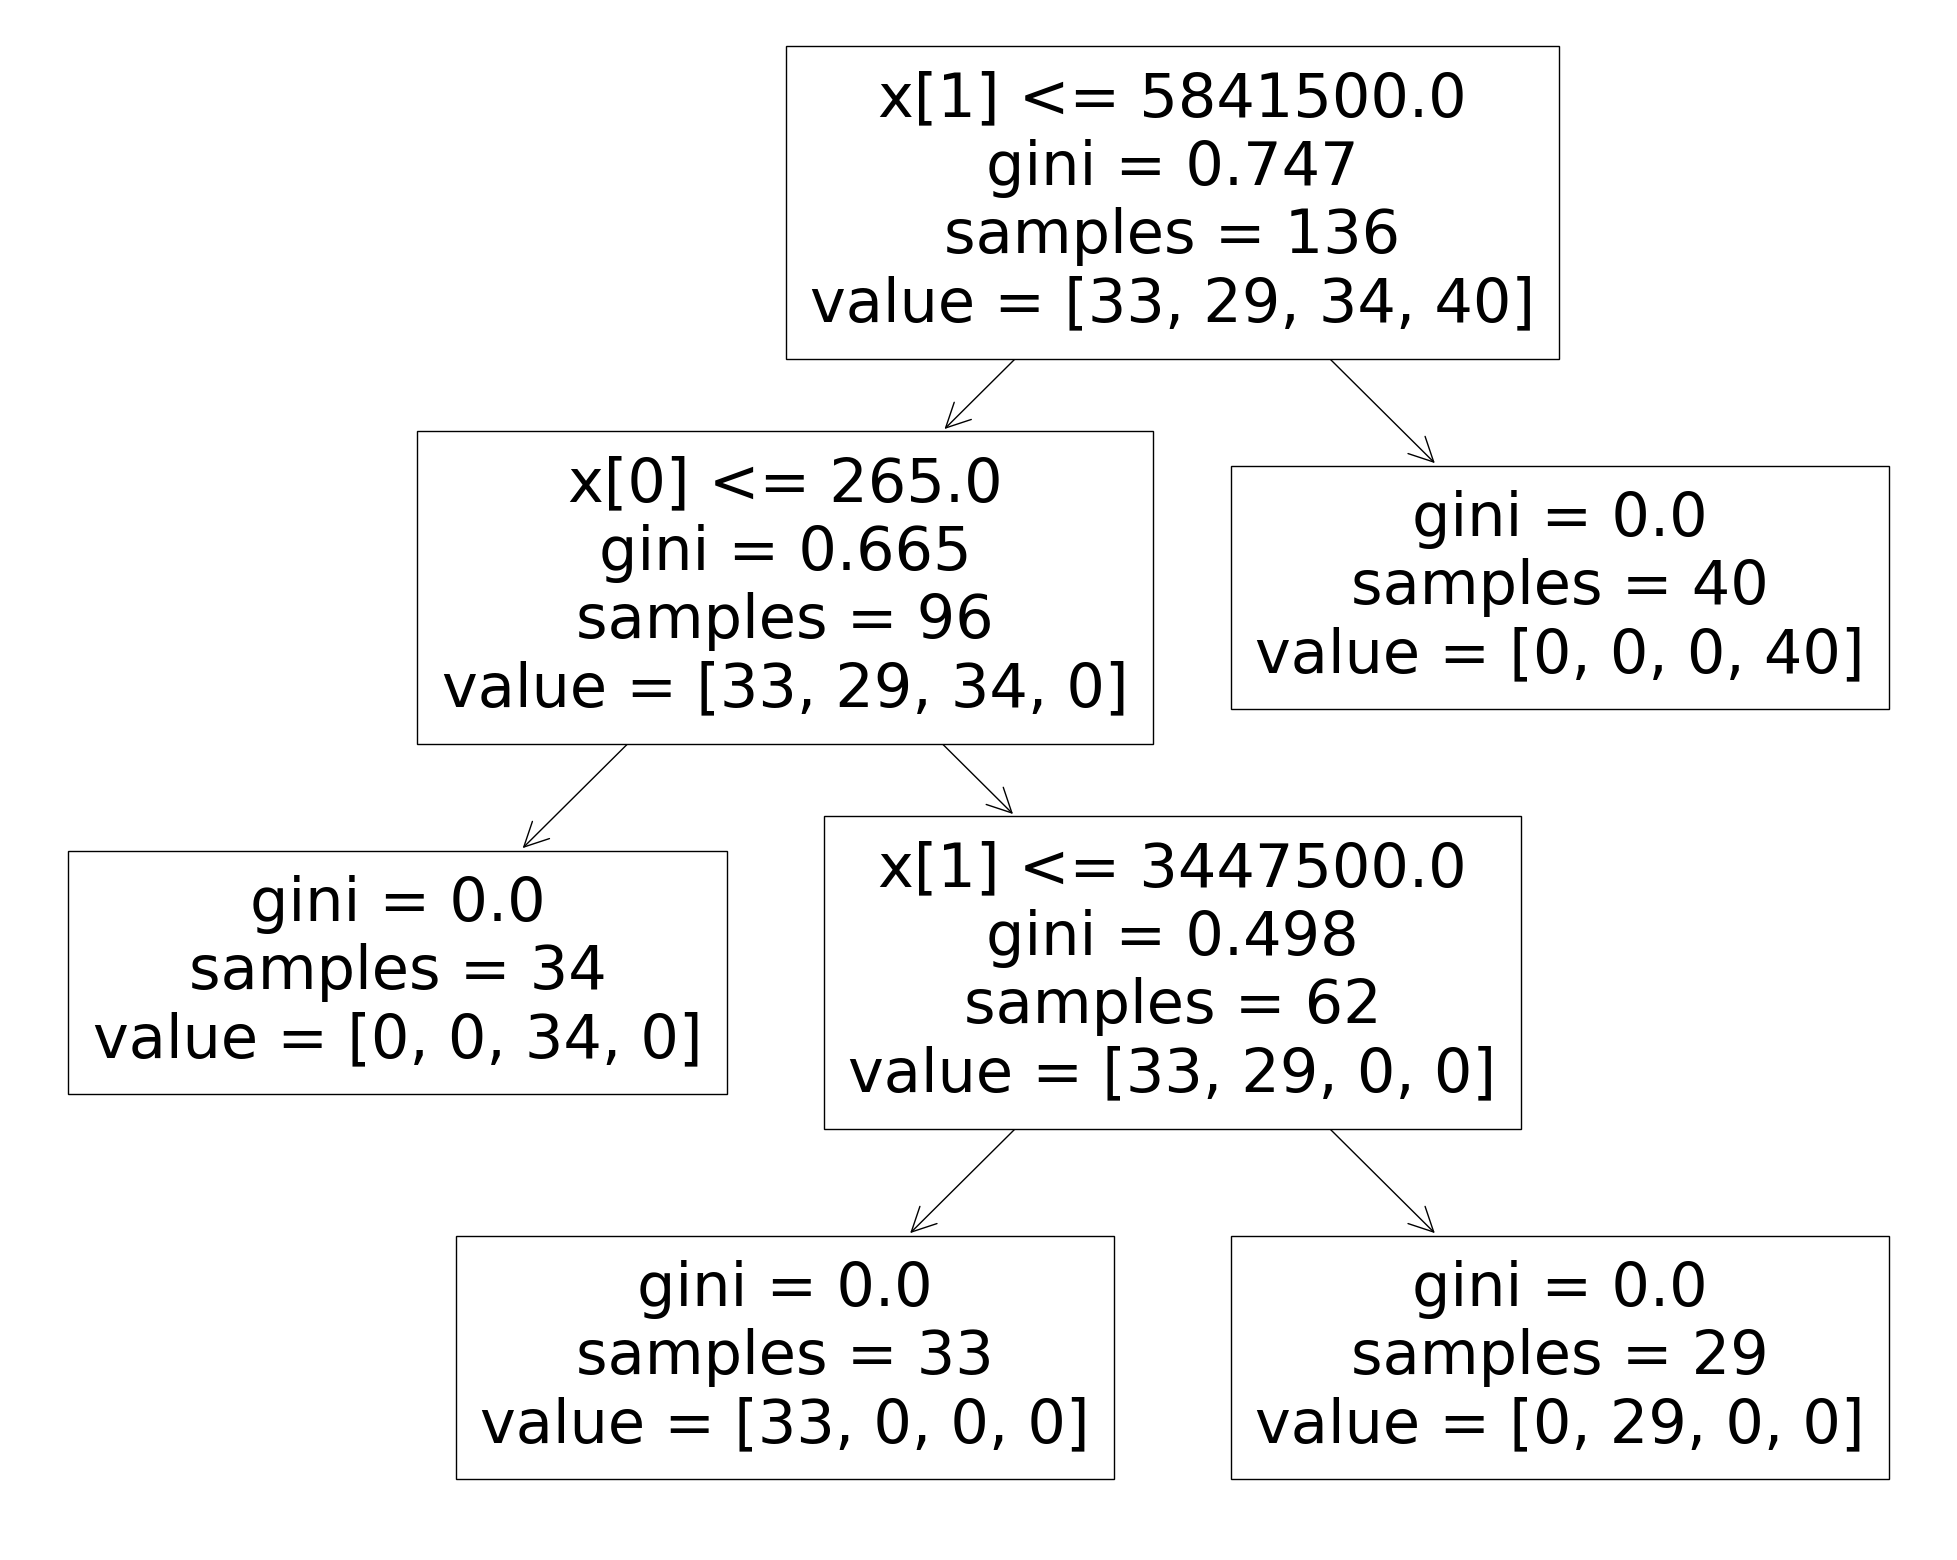

In [18]:
from matplotlib import pyplot as plt
import sklearn.tree
fig = plt.figure(figsize=(25,20))
sklearn.tree.plot_tree(dtree)

# K-Means Clusters next!!

In [19]:
import sys
print(sys.executable)
import platform
print(platform.python_version())

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

c:\ProgramData\anaconda3\python.exe
3.11.5


C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_18552\3891657030.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data[final_data.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KDE'}, hist_kws={'color': 'g'})
C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_18552\3891657030.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

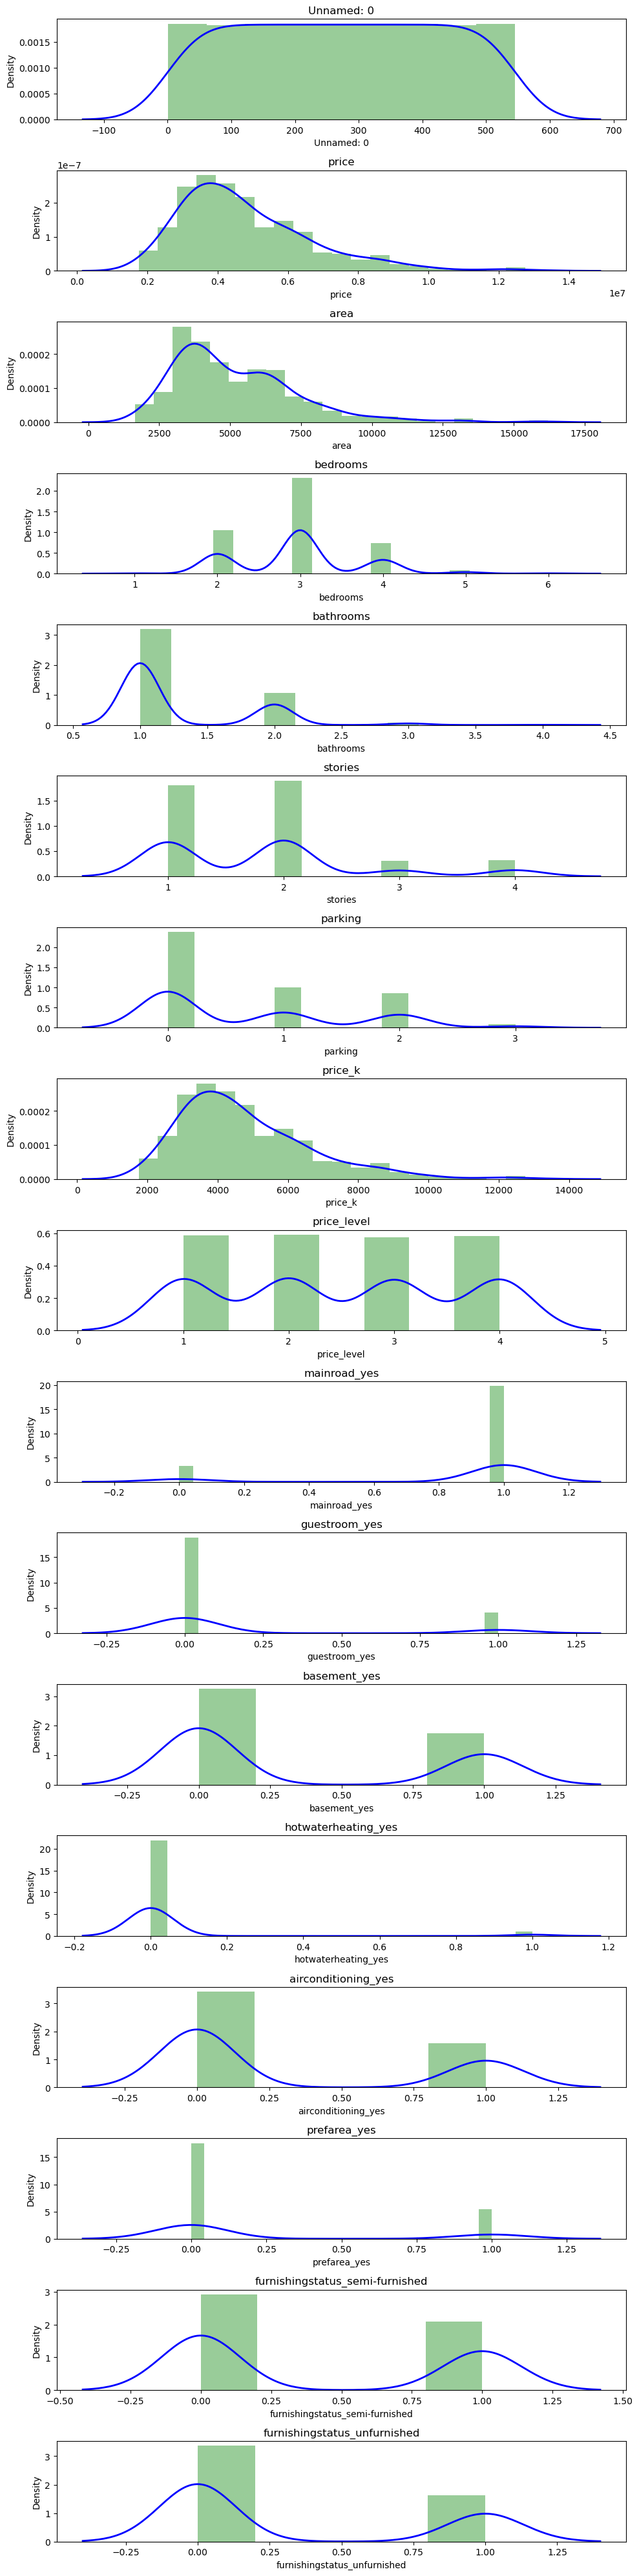

In [20]:
plt.figure(figsize = (10, 40))
for i in range(len(final_data.columns)):
    ax = plt.subplot(17, 1, i + 1)
    #--plot hist and kde in one plot; color, linewidth, label, 
    sns.distplot(final_data[final_data.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KDE'}, hist_kws={'color': 'g'})
    plt.title(final_data.columns[i])

plt.tight_layout()

In [21]:
scaler = StandardScaler()
final_data_scaled = scaler.fit_transform(final_data)

score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(final_data_scaled)
    score_1.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

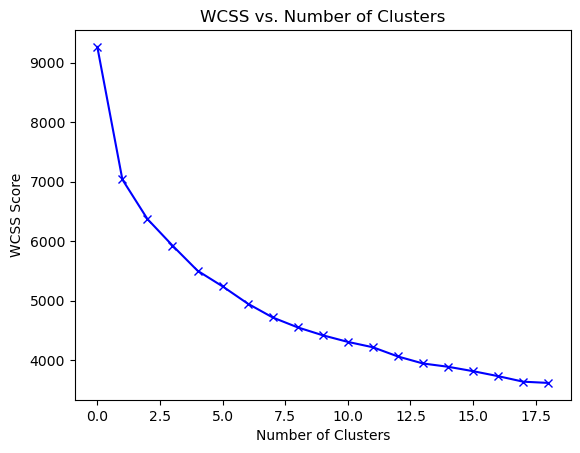

In [22]:
plt.plot(score_1, 'bx-')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.show()

In [23]:
#--k-means++ ensures not falling into random initialization trap
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

labels = kmeans.fit_predict(final_data_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [24]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 0, 0, 3, 1, 3, 1, 1, 3, 1, 0, 0, 0, 3, 3, 1, 3, 0,
       0, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 1,
       3, 3, 3, 0, 0, 3, 0, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 0, 0, 2, 2, 0, 3, 0, 3,
       1, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 1, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 3, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,

In [25]:
final_data_cluster = pd.concat([final_data, pd.DataFrame({'cluster': labels})], axis = 1)

In [26]:
final_data_cluster.head()

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,parking,price_k,price_level,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,cluster
0,1,13300000,7420,4,2,3,2,13300.0,4,True,False,False,False,True,True,False,False,1
1,2,12250000,8960,4,4,4,3,12250.0,4,True,False,False,False,True,False,False,False,1
2,3,12250000,9960,3,2,2,2,12250.0,4,True,False,True,False,False,True,True,False,1
3,4,12215000,7500,4,2,2,3,12215.0,4,True,False,True,False,True,True,False,False,1
4,5,11410000,7420,4,1,2,2,11410.0,4,True,True,True,False,True,False,False,False,1


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

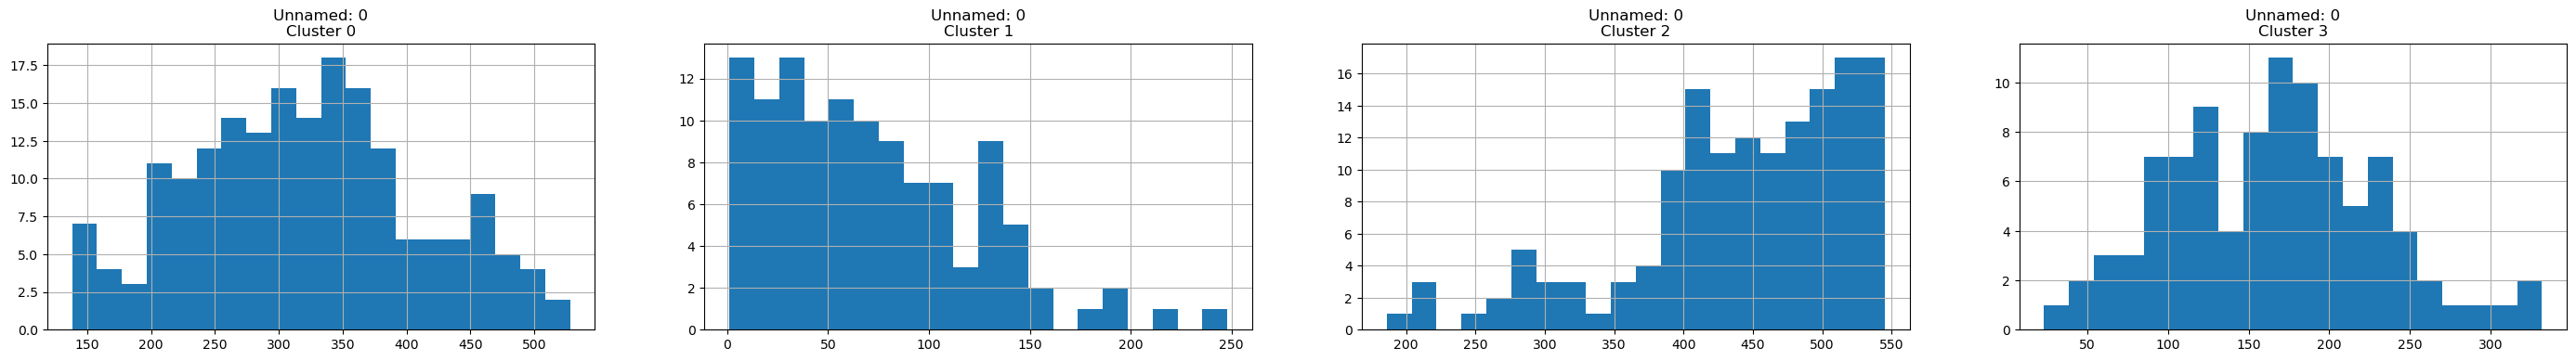

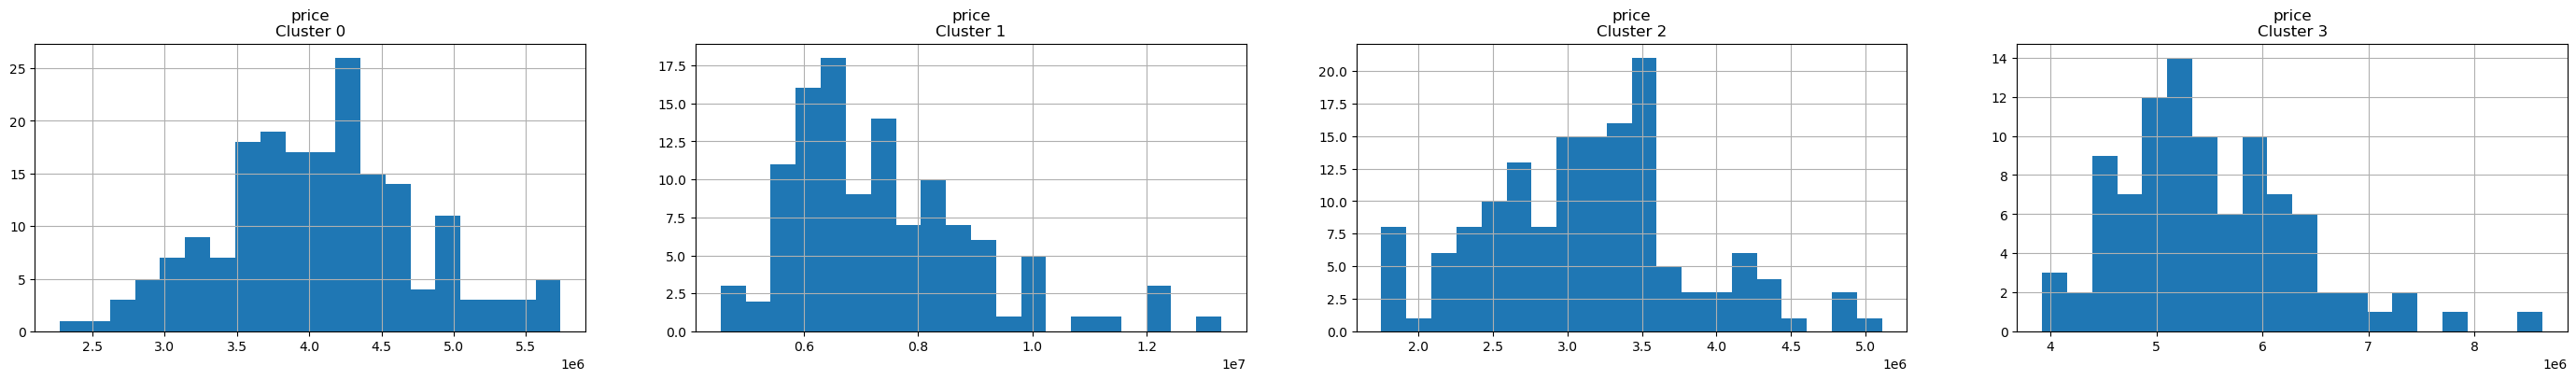

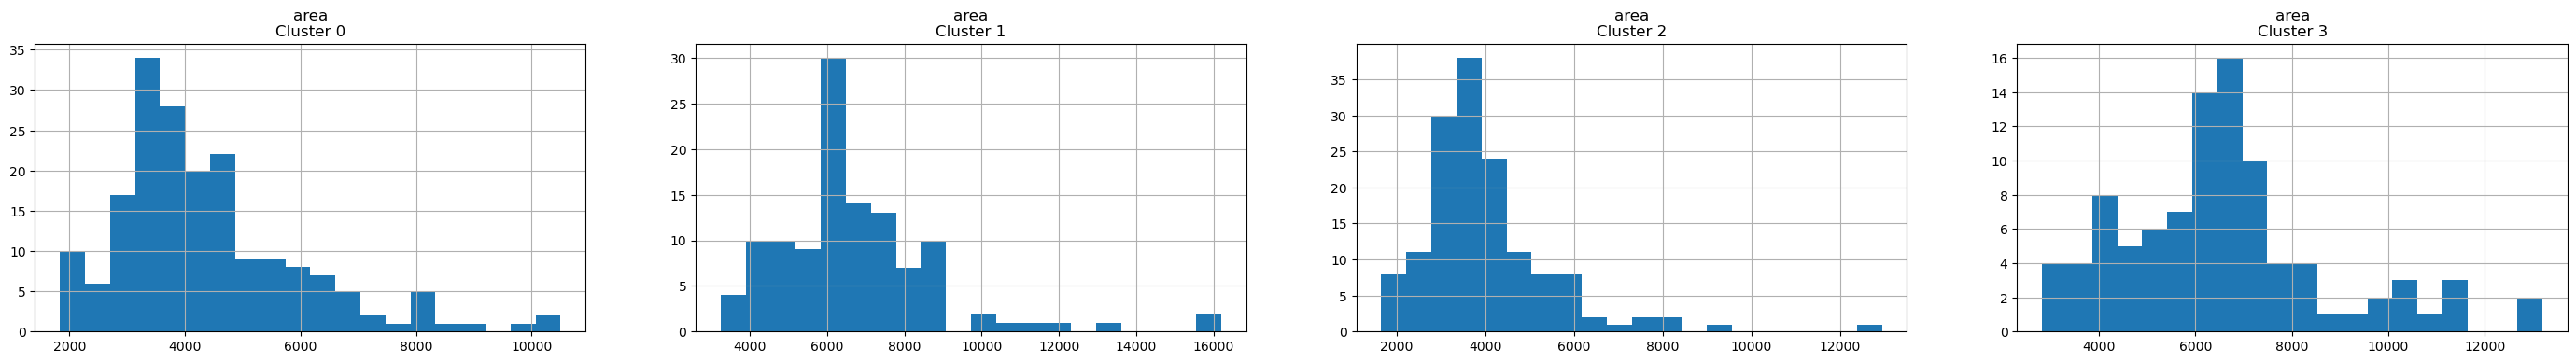

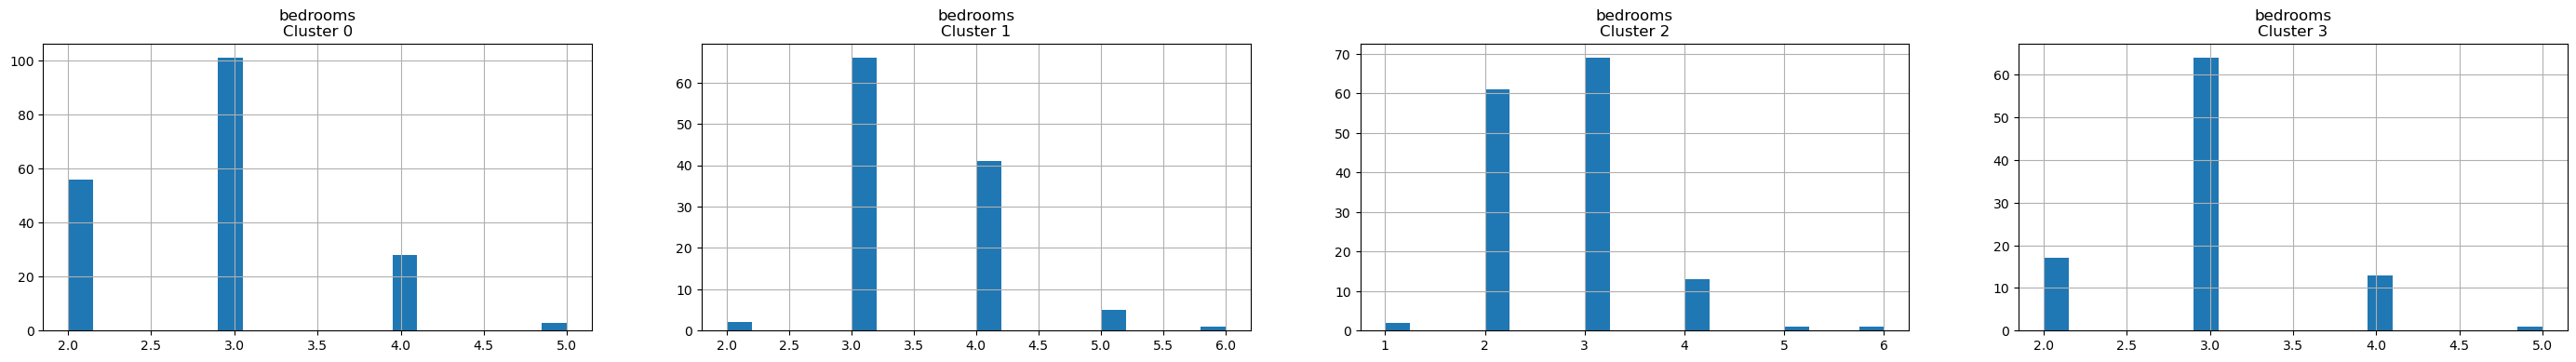

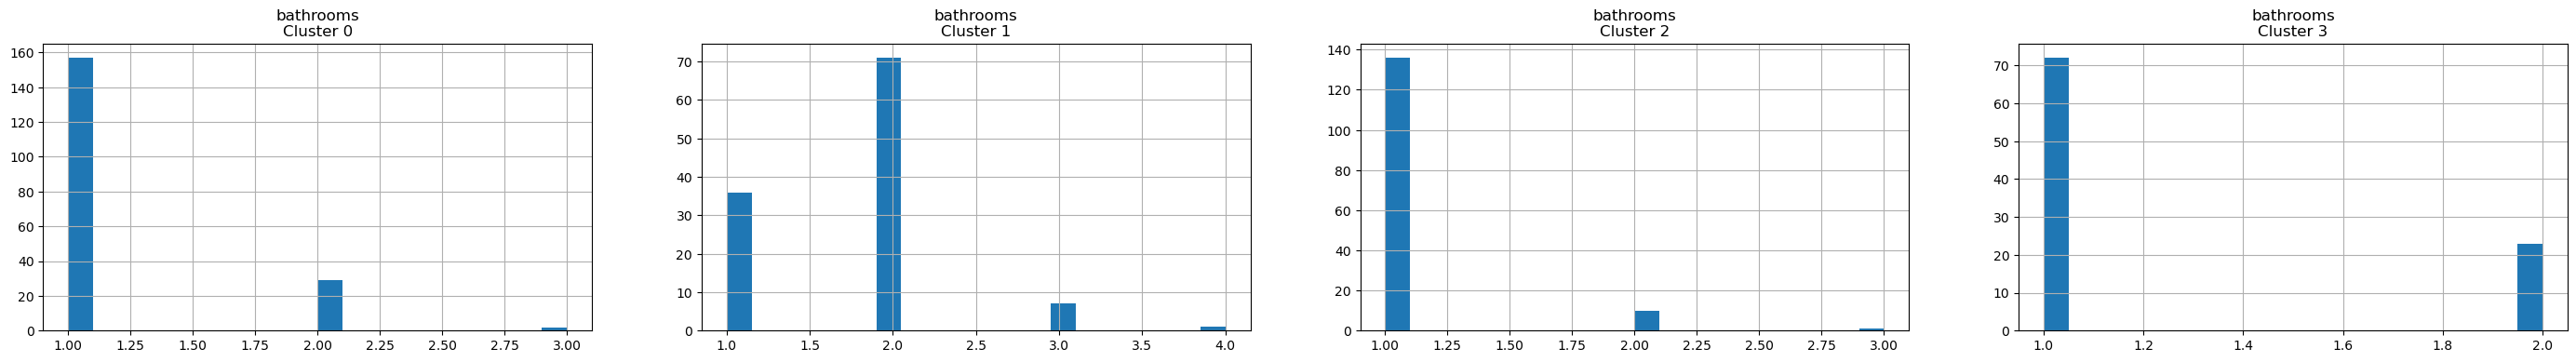

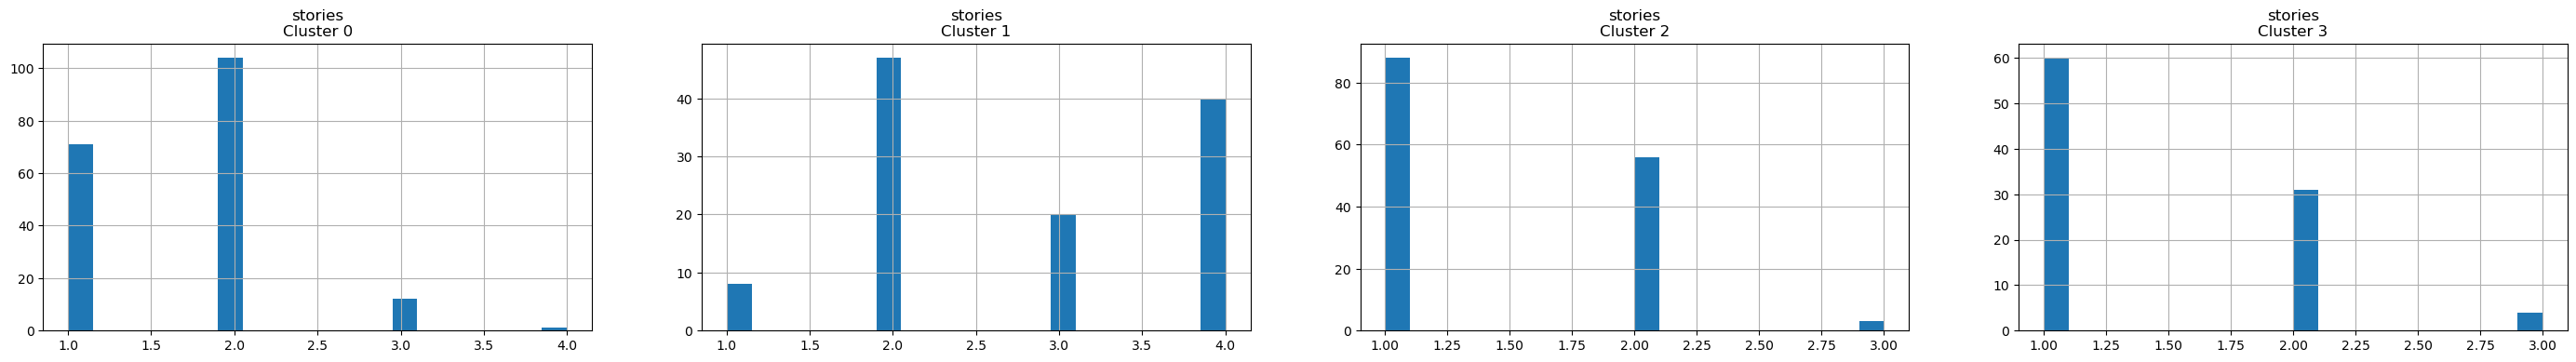

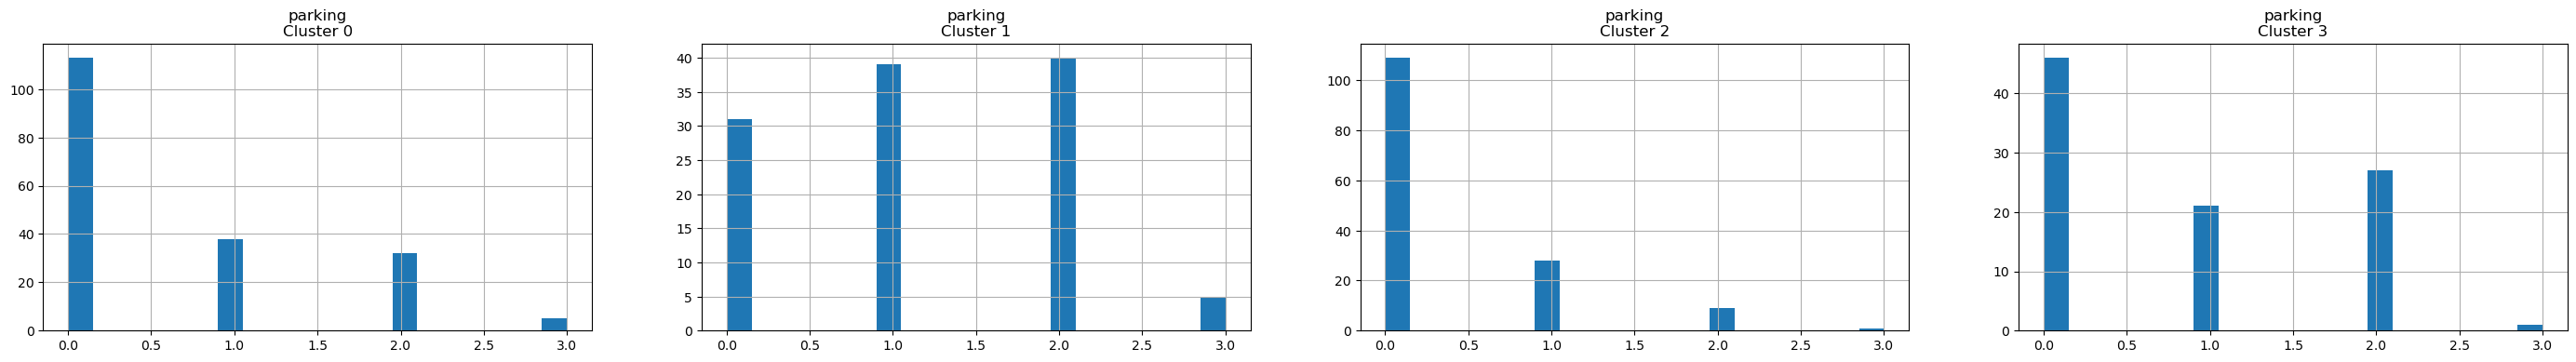

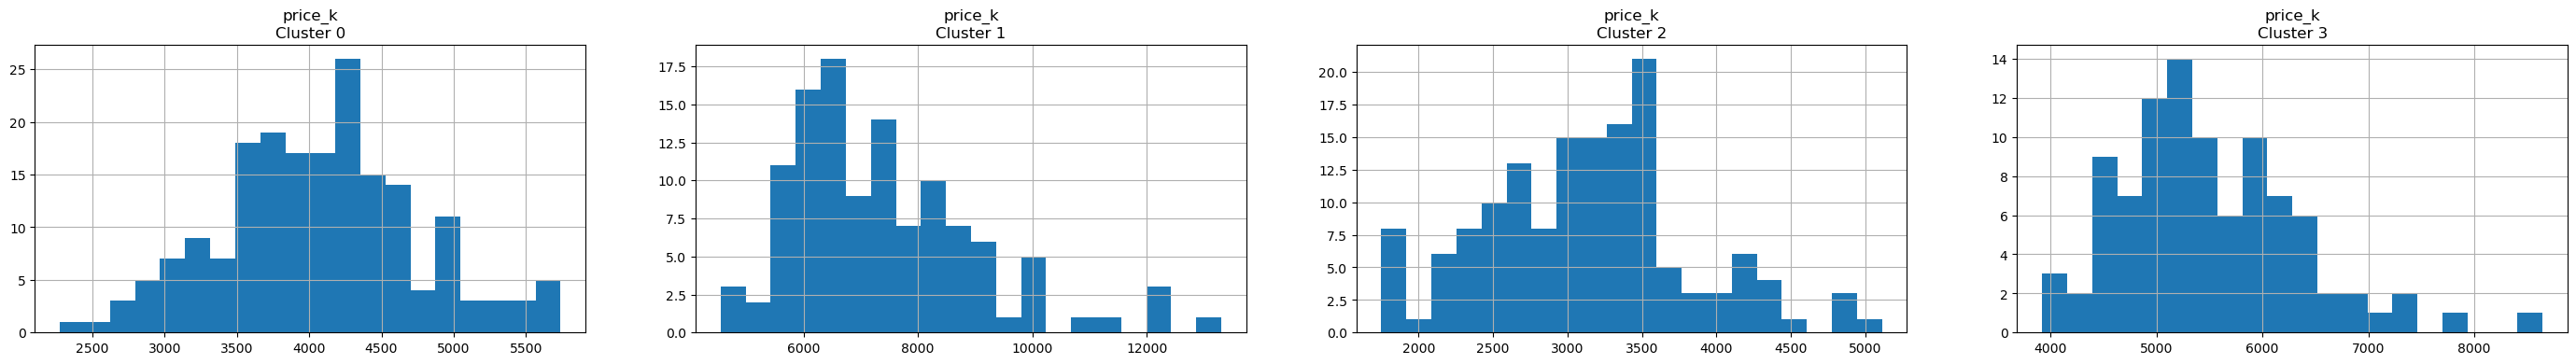

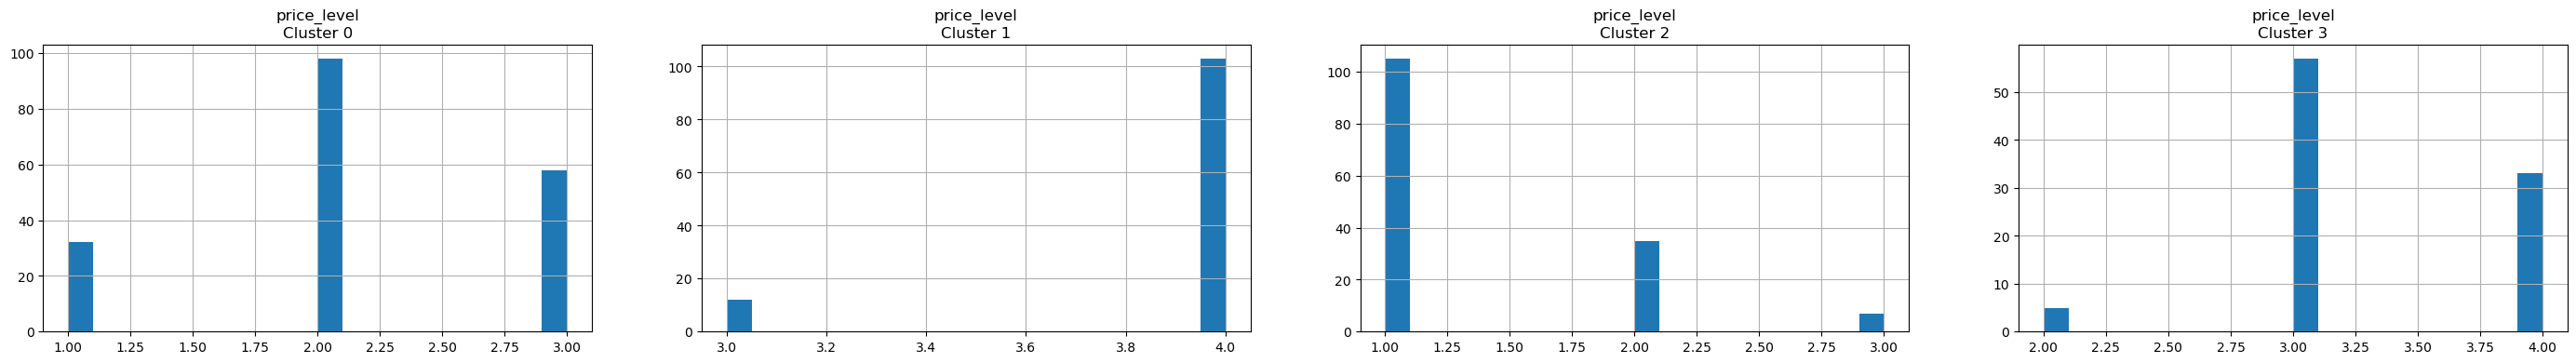

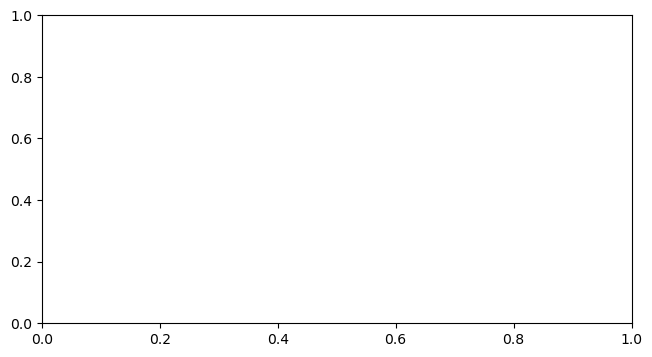

In [27]:
#--each row of figures represents feature distribution for each cluster-----#
for i in final_data_cluster.columns:
    plt.figure(figsize = (35, 4))
    for j in range(4):
        plt.subplot(1, 4, j+1)
        cluster = final_data_cluster[ final_data_cluster['cluster'] == j ]
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j))
plt.show()

In [28]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(final_data_scaled)
principal_comp

array([[ 6.81697048,  1.89092433],
       [ 7.51739826,  3.13233144],
       [ 6.04967811, -1.13771732],
       ...,
       [-3.95496464,  0.68461942],
       [-3.8981136 ,  0.11209925],
       [-3.4530413 ,  1.36583106]])

In [29]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_18552\2513026182.py:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])


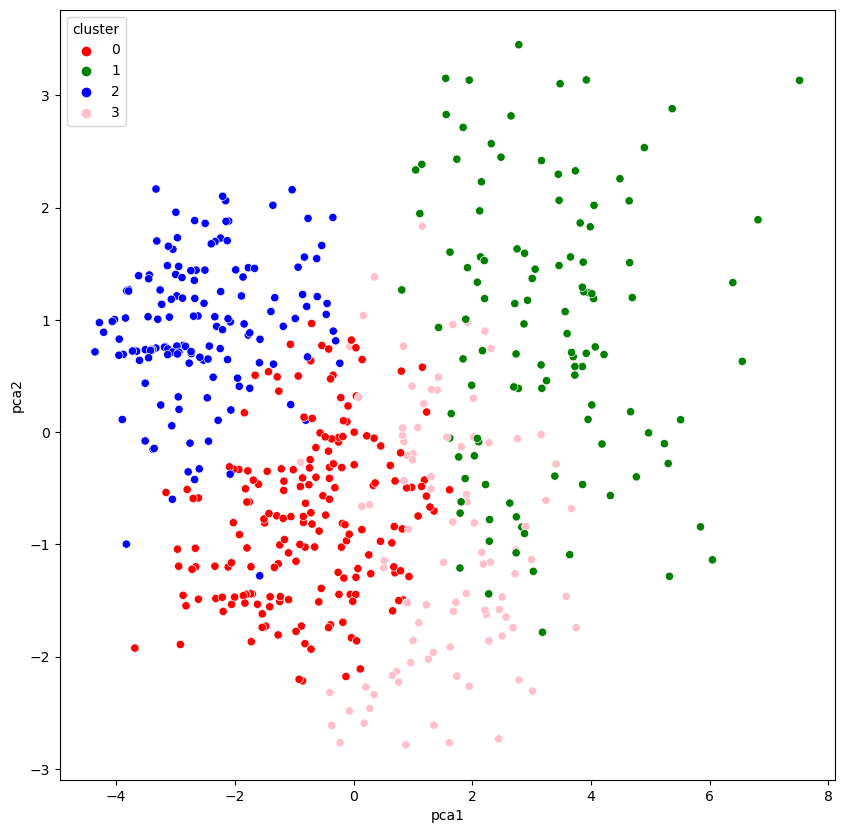

In [30]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])